<a href="https://colab.research.google.com/github/tetiana-martynenko/Python-For-DS/blob/main/4_5_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%B7_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Основні дані для аналізу - набір даних `Yulu`.
### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів.

**1. Завантаження даних та бібліотек для роботи.**



Доля зареєстрованих користувачів по типу(зареєстрований чи ні) впродовж року
Залежність даної долі від погоди
як впливає дельта реальної та фактичної температури на к-ть велосипедів?

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [263]:
df = pd.read_csv('/content/drive/MyDrive/DS_course/data/yulu_rental.csv')

In [7]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [363]:
sum(df['count'])


2085476

In [364]:
sum(df['registered'])

1693341

In [365]:
sum(df['registered'])/sum(df['count'])

0.811968586548107

# **Питання 1**
Проаналізувати показник - долі зареєстрованих користувачів серед загальної кількості користувачів впродовж року(помісячно)

Визначаємо для кожної дати її рік-місяць:

In [264]:
df['datetime'] = pd.to_datetime(df.datetime)

In [265]:
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [266]:
df['year-month'] = df['datetime'].dt.to_period('M')


Визначаємо долю зареєстрованих клієнтів помісячно:

In [267]:
monthly_registered = df.groupby(['year-month'])['registered'].sum()
monthly_total = df.groupby(['year-month'])['count'].sum()
prop_reg = monthly_registered / monthly_total


Будуємо графік по отриманих даних:

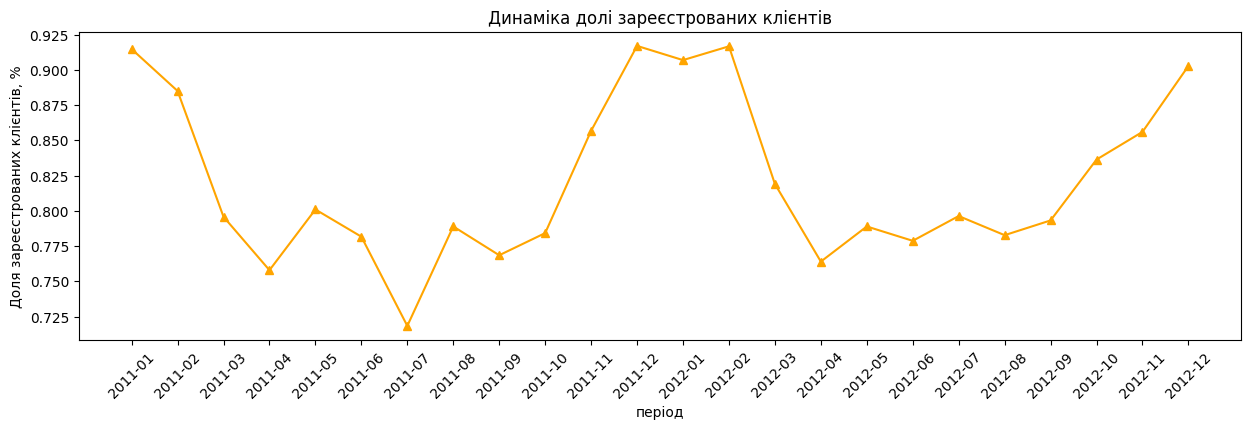

In [268]:
fig, ax1 = plt.subplots(figsize=(15,4))

ax1.plot(prop_reg.index.astype('str'), prop_reg.values, color='orange', marker='^')
ax1.set(xlabel= "період", ylabel= 'Доля зареєстрованих клієнтів, %');

plt.xticks(rotation=45)
plt.title('Динаміка долі зареєстрованих клієнтів');

Визначаємо межі аналізованого показника:

In [269]:
display(round(min(prop_reg.values), 2))
display(round(max(prop_reg.values), 2))
display(round(np.median(prop_reg.values), 2))

0.72

0.92

0.8

Висновки:
аналізований показник знаходиться в межах 72%-92%, а медіана - 80%.Спостерігається позитивна тенденція цього показника, порівнюючи 2011 та 2012 роки. Що свідчить про збільшення лояльності клієнтів до даного сервісу.
Але водночас виникає питання, чи збільшення долі йде пропорційно збільшенню клієнтів загалом, чи, можливо, це пов'язано навпаки із скороченням загального числа клієнтів.

# **Питання 2**
Визначити, як доля зарєстрованих клієнтів залежить від їх загальної к-ті.

Додаємо до попереднього графіку загальну кількість клієнтів.

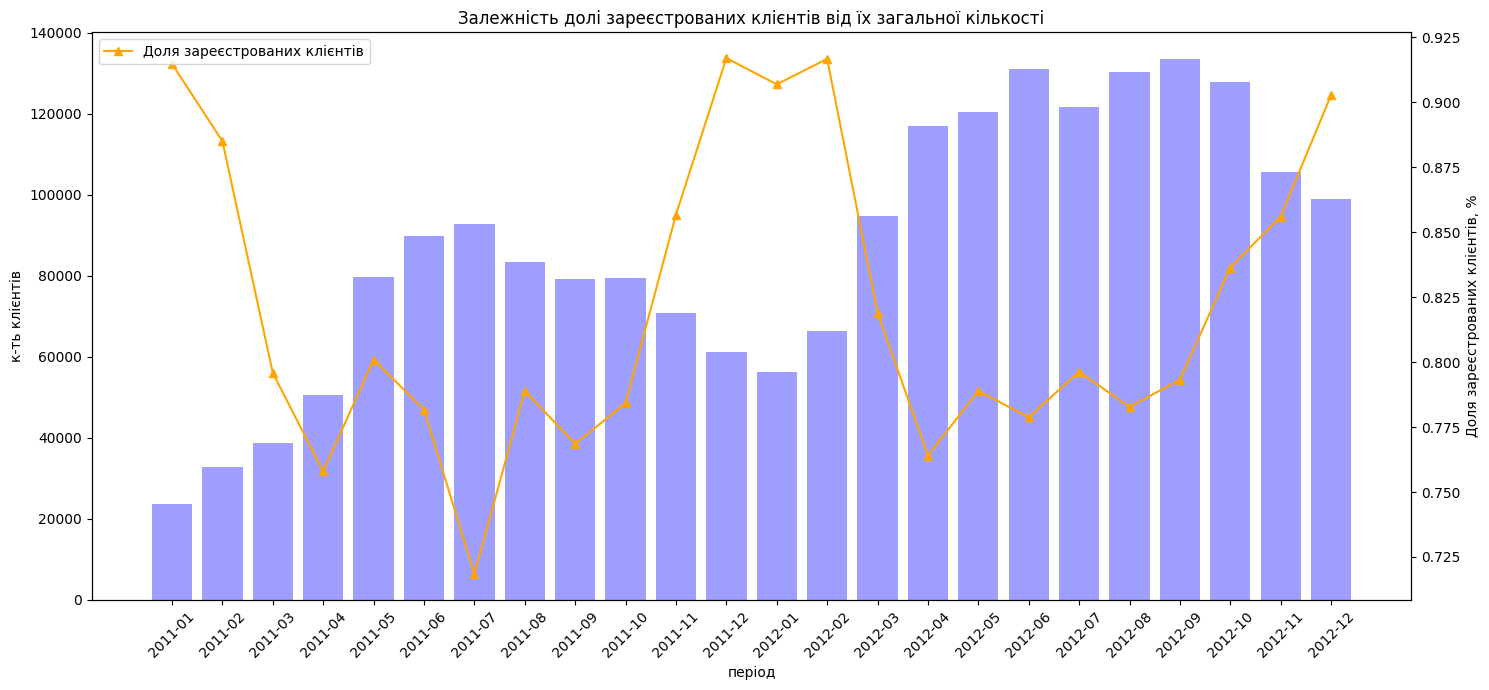

In [270]:
fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(prop_reg.index.astype('str'), monthly_total.values, color='blue', alpha=.38, label='К-ть клієнтів')
ax1.set(xlabel= "період", ylabel= 'к-ть клієнтів', label='jl')
plt.xticks(rotation=45)
plt.title('Залежність долі зареєстрованих клієнтів від їх загальної кількості')

ax2 = ax1.twinx()
ax2.plot(prop_reg.index.astype('str'), prop_reg.values, color='orange', marker='^', label='Доля зареєстрованих клієнтів')
ax2.set(xlabel= "рік-місяць", ylabel= 'Доля зареєстрованих клієнтів, %', label='fdf');
ax2.legend(loc='upper left')
plt.tight_layout();


Висновки:
- з даного графіку можна сказати, що загальна кількість клієнтів також збільшується(приблизно на 40%), що є позитивною тенденцією для сервісу. Цікаво, що у теплі пори роки залежність обернено пропорційна, особливо у літні місяці;
- варто звернути увагу, на місяць липень 2011 та 2012 років. Якщо у першому випадку це значення долі було мінімальним за весь час, то уже наступного року бачимо позитивний здвиг по даному показнику.

 Все це може свідчити про те, що з'являється більше потенційних до реєстрації клієнтів або ж локація сервісу знаходиться у курортному місці й з'являється більше туристів, тому необхідно готуватися до таких періодів - програми залучення й переведення в стан retention. Тоді як у холодні періоди - працювати над рекламою - тобто, збільшувати кількість нових потенційних клієнтів.

# **Питання 3**
У попередніх завданнях дослідили, що сонячна погода без опадів стимулює до використання сервісу - оренди велосипедів. Але також виникла гіпотеза, що локація сервісу туристична, тому й має таку яскраво виражену сезонність.
 Тому цікаво подивитися, чи є подібні піки по святам та вихідних  період сезону(липень) та не сезону (січень).

Визначаємо долю незареєстрованих клієнтів по святам для січня та липня.

In [353]:
filter_df = df[((df.month == 1) | (df.month == 7)) & (df.holiday == 1)]
monthly_casual = filter_df.groupby(['month'])['casual'].sum()
totally = filter_df.groupby(['month'])['count'].sum()
prop_casual = (monthly_casual / totally) * 100

Створюємо графік:

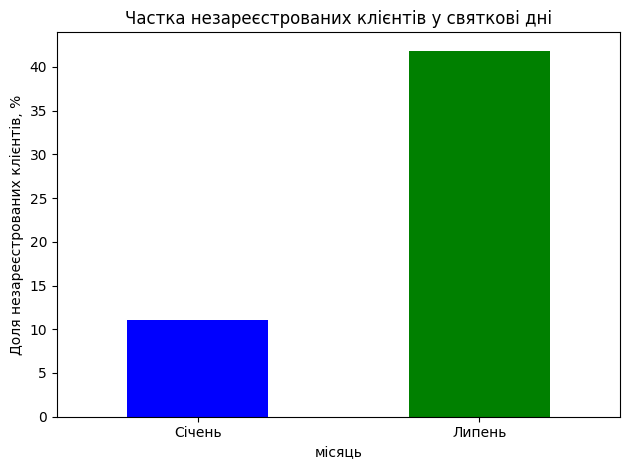

In [358]:
prop_casual.plot(kind='bar', color=['blue', 'green'])

plt.title('Частка незареєстрованих клієнтів у святкові дні')
plt.ylabel('Доля незареєстрованих клієнтів, %')
plt.xlabel('місяць')

plt.xticks(ticks=[0, 1], labels=['Січень', 'Липень'], rotation=0)
plt.tight_layout()


Висновки:
доля незареєстрованих клієнтів по святах в 4 рази більше в липні, що частково нашу гіпотезу, що локація сервісу туристична. Та для остаточного підтвердження, необхідно більш детально проаналізувати дане питання.

Загальні рекомендації:

1. Зосередитися на залученні нових клієнтів у холодний сезон
через рекламу. Літом варто сконцентруватися на утриманні та залученні туристів.
2. Провести поглиблений аналіз для визначення впливу локації сервісу та сезонних змін у поведінці клієнтів.